# ML Major Project


Name: Ravi kumar kanu baniya


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix,recall_score,precision_score
from sklearn.model_selection import cross_validate


In [7]:
data = pd.read_csv('data.csv')

In [8]:
data.head()

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0


In [9]:
data.shape

(2000, 16)

In [10]:
data.columns

Index(['year', 'customer_id', 'phone_no', 'gender', 'age',
       'no_of_days_subscribed', 'multi_screen', 'mail_subscribed',
       'weekly_mins_watched', 'minimum_daily_mins', 'maximum_daily_mins',
       'weekly_max_night_mins', 'videos_watched', 'maximum_days_inactive',
       'customer_support_calls', 'churn'],
      dtype='object')

In [11]:
data.describe()

,year,customer_id,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
count,2000.0,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,1972.000000,2000.000000,1965.000000
mean,2015.0,554887.157500,38.69050,99.750000,270.178425,10.198700,30.620780,100.415500,4.482500,3.250507,1.547000,0.133333
std,0.0,261033.690318,10.20641,39.755386,80.551627,2.785519,9.129165,19.529454,2.487728,0.809084,1.315164,0.340021
min,2015.0,100198.000000,18.00000,1.000000,0.000000,0.000000,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.0,328634.750000,32.00000,73.000000,218.212500,8.400000,24.735000,87.000000,3.000000,3.000000,1.000000,0.000000
50%,2015.0,567957.500000,37.00000,99.000000,269.925000,10.200000,30.590000,101.000000,4.000000,3.000000,1.000000,0.000000
75%,2015.0,773280.250000,44.00000,127.000000,324.675000,12.000000,36.797500,114.000000,6.000000,4.000000,2.000000,0.000000
max,2015.0,999961.000000,82.00000,243.000000,526.200000,20.000000,59.640000,175.000000,19.000000,6.000000,9.000000,1.000000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    2000 non-null   int64  
 1   customer_id             2000 non-null   int64  
 2   phone_no                2000 non-null   object 
 3   gender                  1976 non-null   object 
 4   age                     2000 non-null   int64  
 5   no_of_days_subscribed   2000 non-null   int64  
 6   multi_screen            2000 non-null   object 
 7   mail_subscribed         2000 non-null   object 
 8   weekly_mins_watched     2000 non-null   float64
 9   minimum_daily_mins      2000 non-null   float64
 10  maximum_daily_mins      2000 non-null   float64
 11  weekly_max_night_mins   2000 non-null   int64  
 12  videos_watched          2000 non-null   int64  
 13  maximum_days_inactive   1972 non-null   float64
 14  customer_support_calls  2000 non-null   

In [13]:
data.isnull().sum()

year                       0
customer_id                0
phone_no                   0
gender                    24
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive     28
customer_support_calls     0
churn                     35
dtype: int64

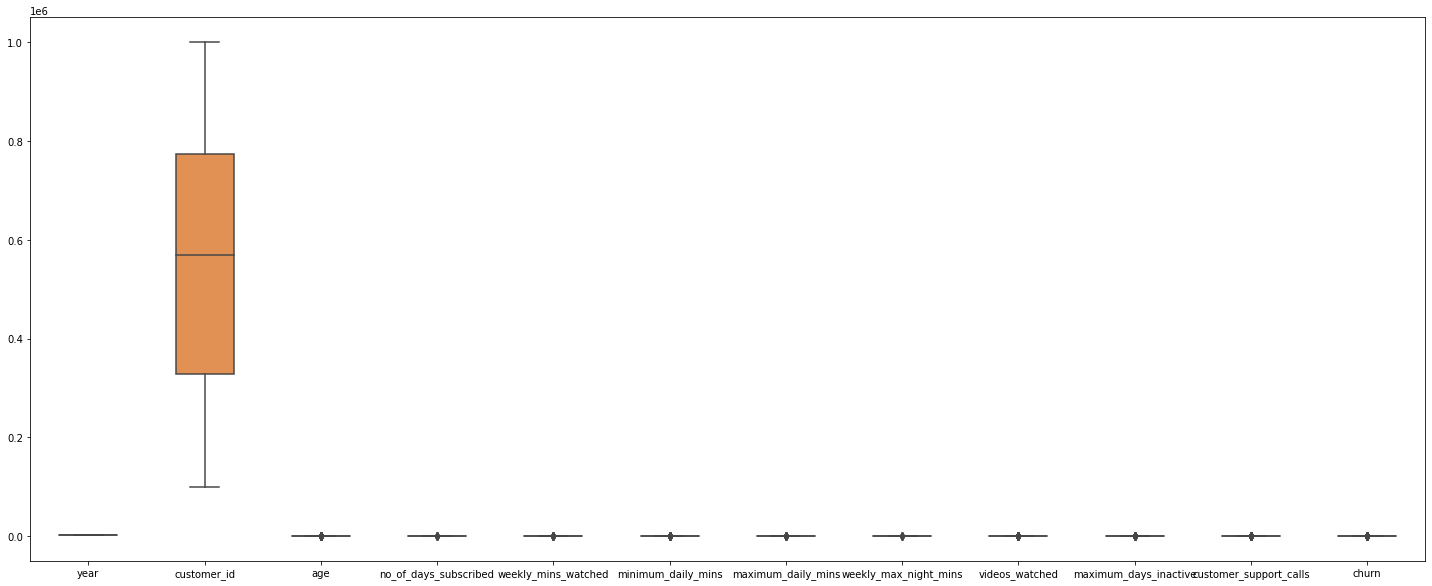

In [14]:
#Let check for outliers.
plt.figure(figsize = (25, 10))
sns.boxplot(data = data, width = 0.5)
plt.show()

In [15]:
#As we can observe from the above graph there is no outlier in this dataset.

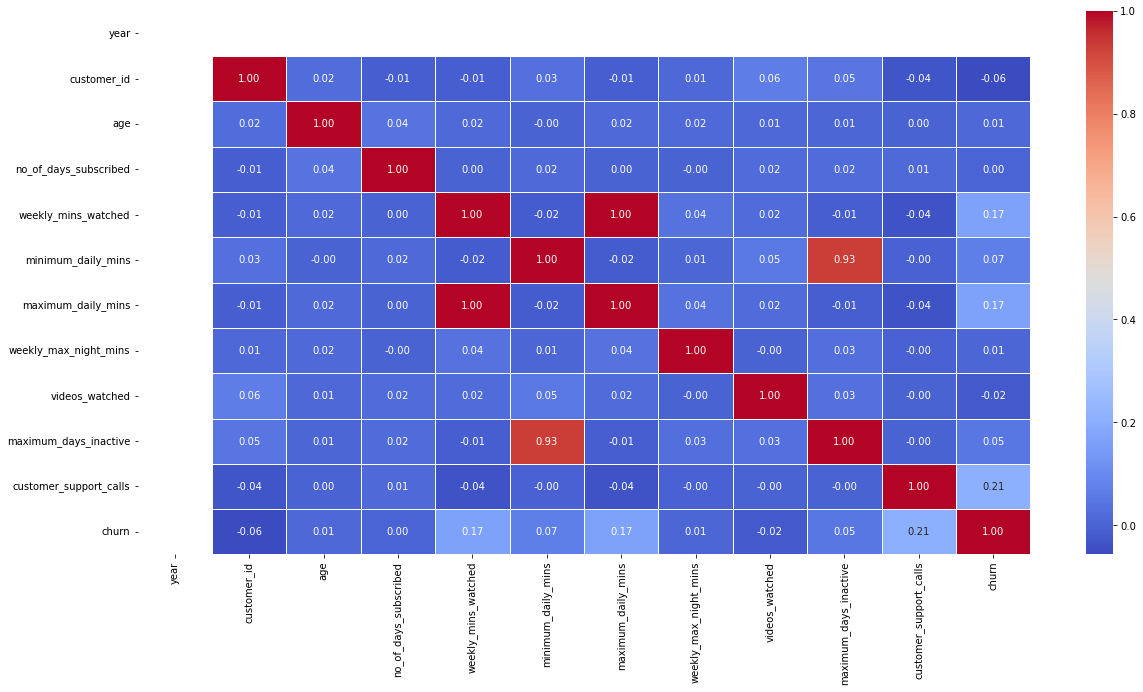

In [16]:
#Now let us check if there is any correlation between columns.
fig, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(data.corr(), annot=True, fmt='1.2f', annot_kws={'size' : 10}, linewidth=1, cmap="coolwarm")
plt.show()

In [17]:
#As we can observe from the above correlation graph that:
#1. Maximum_daily_mins and weekly_min_watched are correlated with correlation coeff 1
#2. Maximum_days_inactive and minimum_daily_mins are correlated with correlation coeff 0.93
#3.Here I would like to drop maximum_days_inactive as we have already seen this column have some missing values.

In [18]:
data.columns

Index(['year', 'customer_id', 'phone_no', 'gender', 'age',
       'no_of_days_subscribed', 'multi_screen', 'mail_subscribed',
       'weekly_mins_watched', 'minimum_daily_mins', 'maximum_daily_mins',
       'weekly_max_night_mins', 'videos_watched', 'maximum_days_inactive',
       'customer_support_calls', 'churn'],
      dtype='object')

In [19]:
data['year'].nunique()
#as we can see this year column has only one unique value. So this column is not contributing in prediction we can drop it.

1

In [20]:
data['customer_id'].nunique()
#as we can see this year column has all 1999 unique value. So this column is not contributing in prediction we can drop it.

1999

In [21]:
data['phone_no'].nunique()
#as we can see this year column has all unique value. So this column is not contributing in prediction we can drop it.

2000

In [22]:
#Now let us drop the irrelavent columns from data set.
data = data.drop(['year', 'customer_id', 'phone_no', 'weekly_mins_watched' ,'maximum_days_inactive'], axis=1)

In [23]:
data.shape

(2000, 11)

In [24]:
data.columns

Index(['gender', 'age', 'no_of_days_subscribed', 'multi_screen',
       'mail_subscribed', 'minimum_daily_mins', 'maximum_daily_mins',
       'weekly_max_night_mins', 'videos_watched', 'customer_support_calls',
       'churn'],
      dtype='object')

In [25]:
data['multi_screen'].value_counts()

no     1802
yes     198
Name: multi_screen, dtype: int64

In [26]:
#well as we can see above still we have some yes values for multiscreen so we cannot ignore this column.


In [27]:
data['mail_subscribed'].value_counts()

no     1430
yes     570
Name: mail_subscribed, dtype: int64

In [28]:
# even cannot drop this column

In [29]:
data.head(10)

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,customer_support_calls,churn
0,Female,36,62,no,no,12.2,16.81,82,1,1,0.0
1,Female,39,149,no,no,7.7,33.37,87,3,2,0.0
2,Female,65,126,no,no,11.9,9.89,91,1,5,1.0
3,Female,24,131,no,yes,9.5,36.41,102,4,3,0.0
4,Female,40,191,no,no,10.9,27.54,83,7,1,0.0
5,NaN,31,65,no,no,12.7,21.95,111,6,4,1.0
6,NaN,54,59,no,no,10.2,27.12,106,4,0,0.0
7,Female,40,50,no,no,5.6,22.29,88,9,5,1.0
8,Male,61,205,no,yes,7.8,29.89,64,5,2,0.0
9,Male,31,63,no,no,12.3,35.90,58,2,0,0.0


In [30]:
#as we can see we have missing values for gender 
#as well for churn but we will never touch our target column.
#As gender is categorical so we will impute by using mode()
#before that let divide data set into train and test

In [31]:
train, test = train_test_split(data, test_size = 0.2, random_state =1)

In [32]:
train.shape, test.shape

((1600, 11), (400, 11))

In [33]:
train['gender'].mode()[0]

'Male'

In [34]:
train['gender']= train['gender'].fillna(train['gender'].mode()[0])

In [35]:
test['gender']= test['gender'].fillna(train['gender'].mode()[0])

In [36]:
train['gender'].isnull().sum()

0

In [37]:
test['gender'].isnull().sum()

0

In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
le = LabelEncoder()

In [40]:
train['gender']= le.fit_transform(train['gender'])

In [41]:
test['gender']= le.transform(test['gender'])

In [42]:
train['multi_screen']= le.fit_transform(train['multi_screen'])

In [43]:
test['multi_screen']= le.transform(test['multi_screen'])

In [44]:
train['mail_subscribed']= le.fit_transform(train['mail_subscribed'])
test['mail_subscribed']= le.transform(test['mail_subscribed'])

In [45]:
test['mail_subscribed'].value_counts()

0    290
1    110
Name: mail_subscribed, dtype: int64

In [46]:
test.head(10)

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,customer_support_calls,churn
674,1,44,52,0,0,7.8,32.62,87,5,3,0.0
1699,0,64,34,0,0,9.9,25.67,86,7,0,0.0
1282,1,75,128,0,1,8.6,30.48,78,7,0,0.0
1315,0,58,90,0,1,5.8,25.52,97,4,1,0.0
1210,1,27,107,1,0,11.0,46.50,67,9,2,0.0
1636,0,36,127,0,1,7.7,40.05,127,2,1,0.0
613,1,37,25,0,0,12.6,22.83,100,5,2,0.0
447,1,39,120,0,1,7.7,40.70,132,3,0,0.0
1131,1,35,36,0,1,6.7,25.40,87,2,0,0.0
808,1,40,161,0,1,7.3,37.15,121,4,1,0.0


In [47]:
train.isnull().sum()

gender                     0
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
customer_support_calls     0
churn                     30
dtype: int64

In [48]:
train.dropna(subset=['churn'] , inplace=True)

In [49]:
train['churn'].isnull().sum()

0

In [50]:
train.shape

(1570, 11)

In [51]:
test.dropna(subset=['churn'] , inplace=True)

In [52]:
test.shape

(395, 11)

In [53]:
train['minimum_daily_mins']= train['minimum_daily_mins'].astype(int)

In [54]:
train['maximum_daily_mins']=train['maximum_daily_mins'].astype(int)

In [55]:
test['minimum_daily_mins']= test['minimum_daily_mins'].astype(int)

In [56]:
test['maximum_daily_mins']=test['maximum_daily_mins'].astype(int)

In [57]:
train['churn']=train['churn'].astype(int)

In [58]:
test['churn']=test['churn'].astype(int)

In [59]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1570 entries, 0 to 1061
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   gender                  1570 non-null   int32
 1   age                     1570 non-null   int64
 2   no_of_days_subscribed   1570 non-null   int64
 3   multi_screen            1570 non-null   int32
 4   mail_subscribed         1570 non-null   int32
 5   minimum_daily_mins      1570 non-null   int32
 6   maximum_daily_mins      1570 non-null   int32
 7   weekly_max_night_mins   1570 non-null   int64
 8   videos_watched          1570 non-null   int64
 9   customer_support_calls  1570 non-null   int64
 10  churn                   1570 non-null   int32
dtypes: int32(6), int64(5)
memory usage: 110.4 KB


In [60]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 674 to 1820
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   gender                  395 non-null    int32
 1   age                     395 non-null    int64
 2   no_of_days_subscribed   395 non-null    int64
 3   multi_screen            395 non-null    int32
 4   mail_subscribed         395 non-null    int32
 5   minimum_daily_mins      395 non-null    int32
 6   maximum_daily_mins      395 non-null    int32
 7   weekly_max_night_mins   395 non-null    int64
 8   videos_watched          395 non-null    int64
 9   customer_support_calls  395 non-null    int64
 10  churn                   395 non-null    int32
dtypes: int32(6), int64(5)
memory usage: 27.8 KB


In [61]:
#Finally all data datas are numerical and integer perfect to begin but 
#firstly we have to scale all of them as the range of features are different.
#Before normalizing them let's separate the feature and target.

In [62]:
x_train = train.drop(['churn'], axis=1)
y_train = train['churn']

In [63]:
x_test = test.drop(['churn'], axis=1)
y_test = test['churn']

In [64]:
x_train.shape, y_train.shape

((1570, 10), (1570,))

In [65]:
x_test.shape, y_test.shape

((395, 10), (395,))

In [66]:
from sklearn.preprocessing import normalize, StandardScaler
ss = StandardScaler()
x_scaled = ss.fit_transform(x_train)

In [67]:
type(x_scaled)

numpy.ndarray

In [68]:
x_scaled


array([[-1.05232246, -0.26585529, -0.95736387, ..., -0.96325849,
        -1.40219328, -0.43386824],
       [ 0.95027907,  0.52541069, -1.1575585 , ..., -1.68478321,
        -0.19899956,  1.08491244],
       [ 0.95027907,  0.62431894,  1.01955809, ...,  1.40746561,
        -1.00112871, -0.43386824],
       ...,
       [-1.05232246,  1.41558492,  0.11868226, ...,  1.56207805,
        -0.60006413,  0.3255221 ],
       [ 0.95027907,  1.01995193,  0.44399853, ..., -0.55095864,
        -0.19899956, -0.43386824],
       [-1.05232246, -0.36476354, -0.08151237, ..., -1.42709581,
        -0.19899956, -1.19325858]])

In [69]:
x_train_scaled = pd.DataFrame(x_scaled, columns = x_train.columns)

In [70]:
x_train_scaled.head()

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,customer_support_calls
0,-1.052322,-0.265855,-0.957364,-0.327404,-0.635841,0.781126,-1.550623,-0.963258,-1.402193,-0.433868
1,0.950279,0.525411,-1.157558,-0.327404,-0.635841,1.495792,-0.889230,-1.684783,-0.199000,1.084912
2,0.950279,0.624319,1.019558,-0.327404,-0.635841,-0.648207,-0.999462,1.407466,-1.001129,-0.433868
3,-1.052322,0.228686,0.544096,-0.327404,-0.635841,1.138459,1.205182,-0.860184,1.405259,0.325522
4,-1.052322,-0.068039,0.794339,-0.327404,1.572721,0.066459,-0.117604,-1.272483,1.806323,-0.433868


In [71]:
x_train_scaled.describe()

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,customer_support_calls
count,1.570000e+03,1.570000e+03,1.570000e+03,1.570000e+03,1.570000e+03,1.570000e+03,1.570000e+03,1.570000e+03,1.570000e+03,1.570000e+03
mean,-1.923444e-17,1.108809e-16,1.564124e-16,1.108809e-16,1.158309e-16,2.600892e-16,8.966642e-17,7.198771e-17,-2.819047e-16,1.206395e-16
std,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00
min,-1.052322e+00,-2.046204e+00,-2.483848e+00,-3.274038e-01,-6.358407e-01,-3.506872e+00,-3.314339e+00,-3.024758e+00,-1.803258e+00,-1.193259e+00
25%,-1.052322e+00,-6.614883e-01,-7.071206e-01,-3.274038e-01,-6.358407e-01,-6.482069e-01,-6.687655e-01,-6.540336e-01,-6.000641e-01,-4.338682e-01
50%,9.502791e-01,-1.669470e-01,-3.146371e-02,-3.274038e-01,-6.358407e-01,6.645942e-02,-7.372218e-03,1.595364e-02,-1.989996e-01,-4.338682e-01
75%,9.502791e-01,5.254107e-01,6.692175e-01,-3.274038e-01,1.572721e+00,7.811258e-01,6.540211e-01,6.859409e-01,6.031296e-01,3.255221e-01
max,9.502791e-01,4.283924e+00,3.572040e+00,3.054333e+00,1.572721e+00,3.639791e+00,3.189362e+00,2.953590e+00,5.816969e+00,5.641254e+00


In [72]:
#now we can see that the range of features are almost same.

In [73]:
x_test_scaled = ss.transform(x_test)
x_test_scaled = pd.DataFrame(x_test_scaled, columns = x_test.columns)

In [74]:
x_test_scaled.head()

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,customer_support_calls
0,0.950279,0.525411,-1.207607,-0.327404,-0.635841,-1.005540,0.213092,-0.705571,0.202065,1.084912
1,-1.052322,2.503576,-1.658045,-0.327404,-0.635841,-0.290874,-0.558533,-0.757109,1.004194,-1.193259
2,0.950279,3.591566,0.694242,-0.327404,1.572721,-0.648207,-0.007372,-1.169408,1.004194,-1.193259
3,-1.052322,1.910126,-0.256683,-0.327404,1.572721,-1.720206,-0.558533,-0.190196,-0.199000,-0.433868
4,0.950279,-1.156030,0.168731,3.054333,-0.635841,0.423793,1.756343,-1.736321,1.806323,0.325522


In [75]:
x_test_scaled.describe()

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,customer_support_calls
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,0.118819,0.004828,-0.063077,0.049296,-0.026389,-0.109946,0.017186,-0.060635,-0.011159,-0.101274
std,0.988043,1.041689,0.989223,1.065303,0.988460,0.969236,1.032464,1.034525,0.990341,0.973299
min,-1.052322,-1.947296,-2.483848,-0.327404,-0.635841,-3.506872,-2.873410,-3.024758,-1.803258,-1.193259
25%,-1.052322,-0.710942,-0.707121,-0.327404,-0.635841,-0.648207,-0.668765,-0.757109,-0.600064,-1.193259
50%,0.950279,-0.166947,-0.031464,-0.327404,-0.635841,-0.290874,0.102860,-0.035584,-0.199000,-0.433868
75%,0.950279,0.426502,0.631681,-0.327404,1.572721,0.423793,0.764253,0.685941,0.603130,0.325522
max,0.950279,3.789383,2.621115,3.054333,1.572721,2.925125,2.638201,3.829727,5.415904,3.363083


In [76]:
#even in test dataset all the feature are in same range as seen in the above table.

In [92]:
#Model Building and Validation.
dt = DecisionTreeClassifier()

dt.fit(x_train_scaled, y_train)

train_pred = dt.predict(x_train_scaled)
pred = dt.predict(x_test_scaled)

train_acc = accuracy_score(y_train, train_pred)
acc = accuracy_score(y_test, pred)
prec = precision_score(y_test,pred)
rec = recall_score(y_test, pred)
train_acc , acc , prec , rec


(1.0, 0.9037974683544304, 0.6078431372549019, 0.6326530612244898)

In [89]:
#Let us do cross validation

In [97]:
cv = cross_validate(dt, x_train_scaled, y_train, scoring = "accuracy", cv=5)
cv['test_score']

array([0.88535032, 0.83757962, 0.84713376, 0.84713376, 0.88535032])

In [98]:
confusion_matrix(y_train, train_pred)

array([[1357,    0],
       [   0,  213]], dtype=int64)

In [99]:
confusion_matrix(y_test, pred)

array([[326,  20],
       [ 18,  31]], dtype=int64)

In [100]:
#we can observe that there is clearly overfitting so we need to do hyper parameter tuning


In [101]:
from sklearn.model_selection import GridSearchCV

param_grid = {'criterion' : ['gini', 'entropy'],
              'min_samples_split' : [2,3,4,5,6,7,8,9,12,14],
              'max_depth' : [3,4,5,6,7,8,9,10,12,14,16,18,20]
             }
tree_clas = DecisionTreeClassifier(random_state=1024)
grid_search = GridSearchCV(estimator=tree_clas, scoring = "accuracy", param_grid=param_grid, cv=5, verbose=True, n_jobs=-1)
grid_search.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 260 candidates, totalling 1300 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1024),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18,
                                       20],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 12, 14]},
             scoring='accuracy', verbose=True)

In [102]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_split=9,
                       random_state=1024)

In [103]:
dtc = DecisionTreeClassifier(random_state=1024, max_depth =6, min_samples_split=9)

In [111]:
dtc.fit(x_train_scaled, y_train)

train_pred = dtc.predict(x_train_scaled)
pred = dtc.predict(x_test_scaled)

train_acc = accuracy_score(y_train, train_pred)
acc = accuracy_score(y_test, pred)
prec = precision_score(y_test,pred)
rec = recall_score(y_test, pred)
train_acc , acc , prec , rec

(0.9452229299363057,
 0.9316455696202531,
 0.7619047619047619,
 0.6530612244897959)

In [112]:
confusion_matrix(y_test, pred)
#better than before, missing prediction are minimized..

array([[336,  10],
       [ 17,  32]], dtype=int64)

In [113]:
cv = cross_validate(dtc, x_train_scaled, y_train, scoring = "accuracy", cv=5)
cv['test_score']

array([0.93312102, 0.89490446, 0.92356688, 0.91401274, 0.91719745])

In [ ]:
#since all the 5 values are close , Hence this is the best model for given parameter..
# Thank You Verzeo